<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Scatter Plot**


Estimated time needed: **45** minutes


## Overview

In this lab, you will focus on creating and interpreting scatter plots to visualize relationships between variables and trends in the dataset. The provided dataset will be directly loaded into a pandas DataFrame, and various scatter plot-related visualizations will be created to explore developer trends, compensation, and preferences.



## Objectives


In this lab, you will:

- Create and analyze scatter plots to examine relationships between variables.

- Use scatter plots to identify trends and patterns in the dataset.

- Focus on visualizations centered on scatter plots for better data-driven insights.


## Setup: Working with the Database



**Install and import the required libraries**


In [1]:
!pip install pandas
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 146.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 155.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 166.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 128.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 85.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 130.0 MB/s eta 0:00:00


#### Step 1: Load the dataset


In [2]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)



### Task 1: Exploring Relationships with Scatter Plots



#### 1. Scatter Plot for Age vs. Job Satisfaction



Visualize the relationship between respondents' age (`Age`) and job satisfaction (`JobSatPoints_6`). Use this plot to identify any patterns or trends.




In [3]:

#defining a function to convert the Age column to numeric values

def Age_to_numeric(v):
    if pd.isna(v):
        return np.nan

    elif '25-34 years old' in v:
        return 30
    elif '35-44 years old' in v:
        return 40
    elif '18-24 years old' in v:
        return 22
    elif '45-54 years old' in v:
        return 50
    elif '55-64 years old' in v:
        return 60
    elif 'Under 18 years old' in v:
        return 17
    elif '65 years or older' in v:
        return 67
    elif  'Prefer not to say' in v:
        return 41 #the mean of the other values. 

#applying the function to the age Column and verifying that it worked. 
df['Age_numeric'] = df['Age'].apply(Age_to_numeric)
df['Age_numeric'].describe()

count    65437.000000
mean        33.630790
std         10.974272
min         17.000000
25%         22.000000
50%         30.000000
75%         40.000000
max         67.000000
Name: Age_numeric, dtype: float64

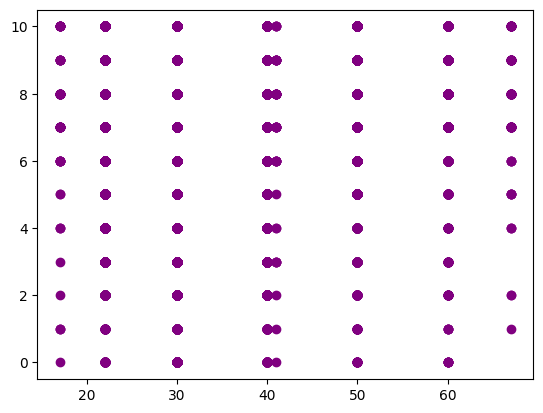

In [7]:
plt.scatter(df['Age_numeric'], df['JobSat'], color = 'purple')

plt.show()

#### 2. Scatter Plot for Compensation vs. Job Satisfaction


Explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) using a scatter plot.


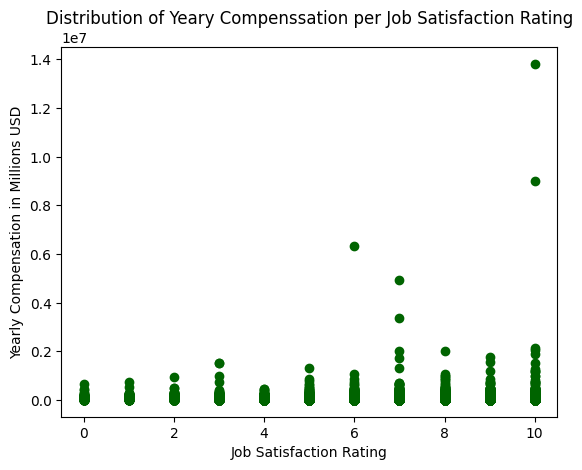

In [10]:
## Write your code here
plt.scatter(df['JobSat'],df['ConvertedCompYearly'], color = 'darkgreen')
plt.title('Distribution of Yeary Compenssation per Job Satisfaction Rating')
plt.xlabel('Job Satisfaction Rating')
plt.ylabel('Yearly Compensation in Millions USD')
plt.show()

### Task 2: Enhancing Scatter Plots


#### 1. Scatter Plot with Trend Line for Age vs. Job Satisfaction



Add a regression line to the scatter plot of Age vs. JobSatPoints_6 to highlight trends in the data.


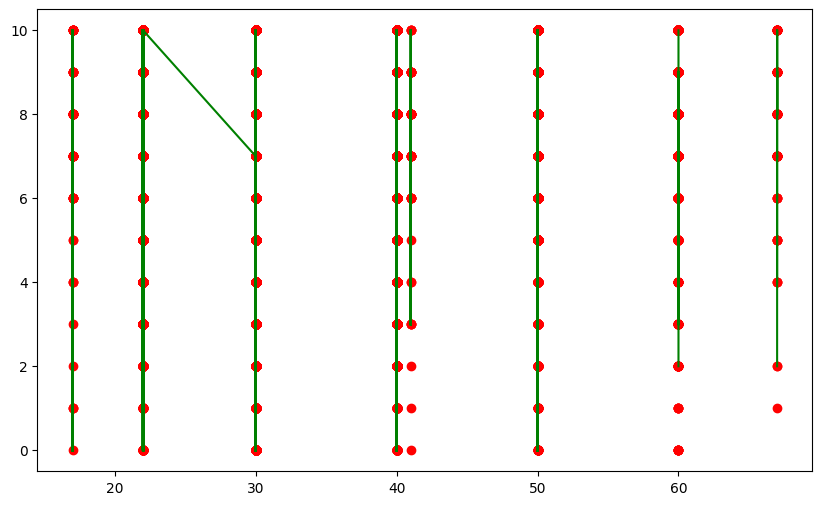

In [16]:
## Write your code here
plt.figure(figsize=(10,6))
df_sort = df.sort_values('Age_numeric')
plt.scatter(df['Age_numeric'], df['JobSat'], color = 'red')
plt.plot(df_sort['Age_numeric'], df['JobSat'], color = 'green')
plt.show()

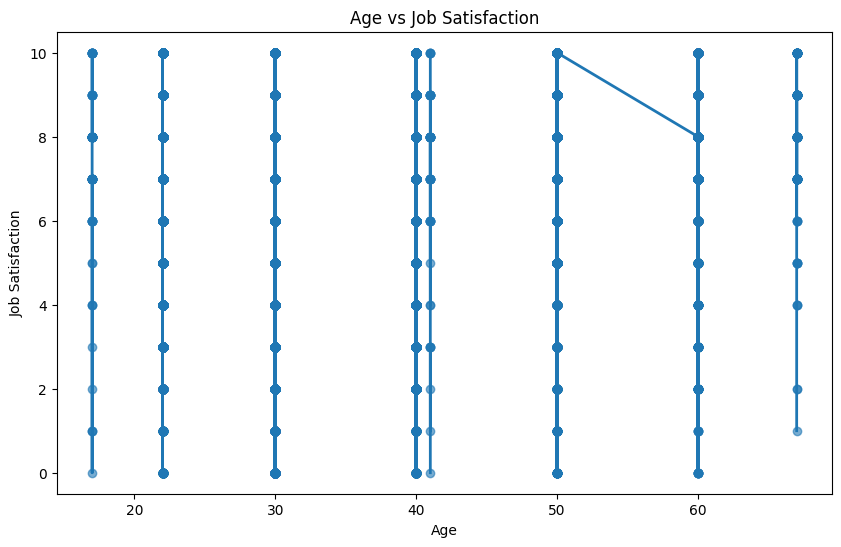

In [12]:
plt.figure(figsize=(10,6))

# Sort by Age before plotting the line plot
df_sorted = df.sort_values('Age_numeric')

# Scatter plot (raw data)
plt.scatter(df['Age_numeric'], df['JobSat'], alpha=0.6)

# Line plot (smoothed / ordered data)
plt.plot(df_sorted['Age_numeric'], df_sorted['JobSat'], linewidth=2)

plt.xlabel("Age")
plt.ylabel("Job Satisfaction")
plt.title("Age vs Job Satisfaction")
plt.show()


#### 2. Scatter Plot for Age vs. Work Experience


Visualize the relationship between Age (`Age`) and Work Experience (`YearsCodePro`) using a scatter plot.


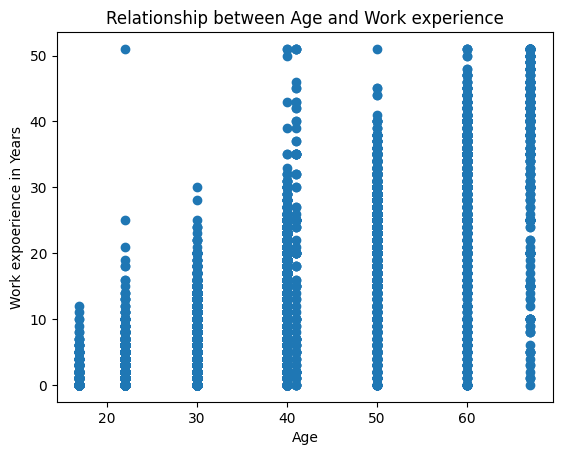

In [20]:
plt.scatter(df['Age_numeric'], df['YearsCodePro_clean'])
plt.title('Relationship between Age and Work experience')
plt.xlabel('Age')
plt.ylabel('Work expoerience in Years')
plt.show()

In [ ]:
#The higher the age, the higher the work experience, showing a positive relationship.

In [22]:
corr = df[['Age_numeric', 'YearsCodePro_clean']].corr()
corr
#there is high correlation between Age and Work Experience.

,Age_numeric,YearsCodePro_clean
Age_numeric,1.000000,0.832416
YearsCodePro_clean,0.832416,1.000000


In [18]:
%pip install numpy
import numpy as np
## Standardizing the 'YearsCodePro' column before binning 
def clean_years_code_pro(val): # Creating a function to convert the str values into numeric values. 
    if pd.isnull(val): 
        return np.nan
    elif val == 'Less than 1 year':
        return 0
    elif val == 'More than 50 years':
        return 51 
    else:
        return float(val)

 #applying the function and assigning to a new column
df['YearsCodePro_clean'] = df['YearsCodePro'].apply(clean_years_code_pro) 

#Checking that my code worked as expected 
df['YearsCodePro_clean'].value_counts() 

Note: you may need to restart the kernel to use updated packages.


YearsCodePro_clean
2.0     4168
3.0     4093
5.0     3526
10.0    3251
4.0     3215
0.0     2856
6.0     2843
1.0     2639
8.0     2549
7.0     2517
12.0    1777
15.0    1635
20.0    1549
9.0     1493
11.0    1312
13.0    1127
14.0    1082
25.0     998
16.0     946
18.0     867
17.0     814
30.0     689
24.0     632
19.0     516
22.0     492
23.0     448
26.0     426
27.0     380
21.0     380
28.0     342
35.0     285
29.0     196
40.0     194
32.0     194
34.0     169
38.0     134
33.0     132
36.0     119
31.0     106
37.0     104
45.0      56
42.0      55
39.0      54
41.0      51
51.0      50
44.0      42
43.0      37
46.0      21
50.0      14
48.0      14
49.0      11
47.0      10
Name: count, dtype: int64

### Task 3: Combining Scatter Plots with Additional Features


#### 1. Bubble Plot of Compensation vs. Job Satisfaction with Age as Bubble Size



Create a bubble plot to explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), with bubble size representing age.


In [29]:
#filtering the data in the ConvertedCompYearly column 1-99%
low = df['ConvertedCompYearly'].quantile(0.01)
high = df['ConvertedCompYearly'].quantile(0.99)
df['CompYearlyFiltered'] = df['ConvertedCompYearly'][(df['ConvertedCompYearly']>=low)& (df['ConvertedCompYearly']<=high)]

df['CompYearlyFiltered']=df['CompYearlyFiltered'].astype('float')
df['CompYearlyFiltered'].describe()

count     22965.000000
mean      78606.216329
std       61963.639186
min         209.000000
25%       33758.000000
50%       65000.000000
75%      107406.000000
max      386662.000000
Name: CompYearlyFiltered, dtype: float64

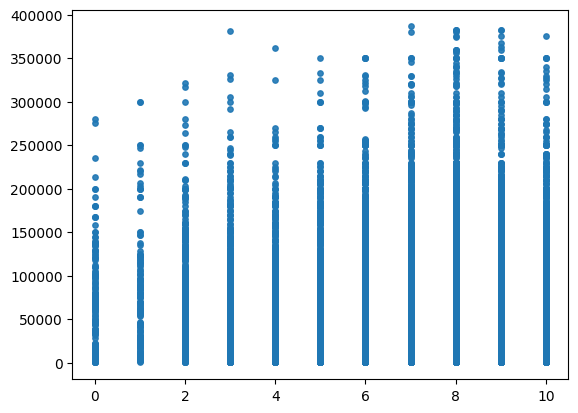

In [30]:
## After removing the outliers, I get a more readable and meaningful visualization. 

plt.scatter(df['JobSat'], df['CompYearlyFiltered'], s = 15, alpha = 0.9)
plt.show()

#### 2. Scatter Plot for Popular Programming Languages by Job Satisfaction


Visualize the popularity of programming languages (`LanguageHaveWorkedWith`) against job satisfaction using a scatter plot. Use points to represent satisfaction levels for each language.


In [35]:
## Write your code here
top5 = df['LanguageHaveWorkedWith'].value_counts().head(5).index
top5


Index(['HTML/CSS;JavaScript;TypeScript', 'Python',
       'HTML/CSS;JavaScript;PHP;SQL', 'C#', 'HTML/CSS;JavaScript'],
      dtype='object', name='LanguageHaveWorkedWith')

In [37]:
top5df = df[df['LanguageHaveWorkedWith'].isin(top5)]
top5df

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat,Age_numeric,YearsCodePro_clean,CompYearlyFiltered
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN,50,27.0,NaN
7,8,I am learning to code,18-24 years old,"Student, full-time;Not employed, but looking f...",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Video-based Online Cou...,...,NaN,NaN,NaN,Appropriate in length,Difficult,NaN,NaN,22,NaN,NaN
9,10,I am a developer by profession,35-44 years old,"Independent contractor, freelancer, or self-em...",Remote,Apples,Bootstrapping a business,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,Too long,Easy,NaN,NaN,40,11.0,NaN
17,18,I am a developer by profession,18-24 years old,"Independent contractor, freelancer, or self-em...",Remote,Apples,Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Blogs;Coding sessions (live or recorded);How-t...,...,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN,22,3.0,NaN
37,38,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Apples,Contribute to open-source projects;Bootstrappi...,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",On the job training;Online Courses or Certific...,NaN,...,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN,30,6.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65298,65299,I am learning to code,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Freelance/contract work,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30,NaN,NaN
65307,65308,I am a developer by profession,25-34 years old,"Employed, full-time",In-person,Apples,Bootstrapping a business,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30,NaN,NaN
65328,65329,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22,NaN,NaN
65338,65339,I am learning to code,18-24 years old,"Student, full-time;Not employed, but looking f...",NaN,Apples,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22,NaN,NaN


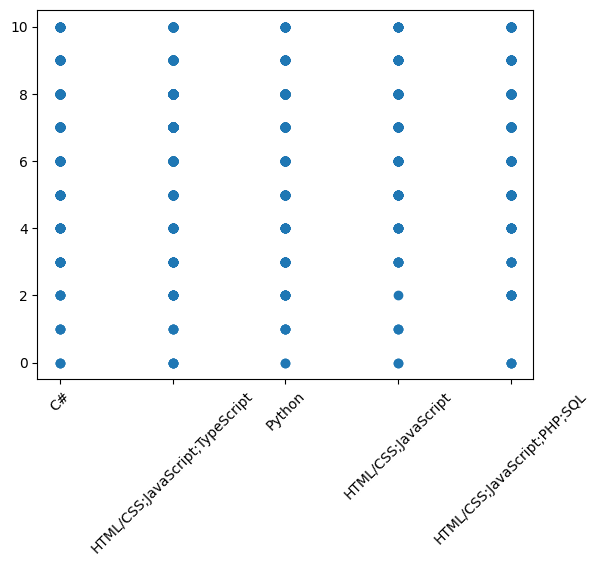

In [40]:
plt.scatter(top5df['LanguageHaveWorkedWith'], top5df['JobSat'])
plt.xticks(rotation = 45)
plt.show()

### Task 4: Scatter Plot Comparisons Across Groups


#### 1. Scatter Plot for Compensation vs. Job Satisfaction by Employment Type


Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), categorized by employment type (`Employment`). Use color coding or markers to differentiate between employment types.


In [46]:
%pip install seaborn
import seaborn as sns



Note: you may need to restart the kernel to use updated packages.


In [41]:
#viewing and sorting all the different employment titles in my df, as there are to many, sorting also helps in deciding how to standardize the column
sorted_emp = sorted(df['Employment'].dropna().unique())
sorted_emp

['Employed, full-time',
 'Employed, full-time;Employed, part-time',
 'Employed, full-time;Independent contractor, freelancer, or self-employed',
 'Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time',
 'Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time;Retired',
 'Employed, full-time;Independent contractor, freelancer, or self-employed;Not employed, and not looking for work',
 'Employed, full-time;Independent contractor, freelancer, or self-employed;Not employed, and not looking for work;Employed, part-time',
 'Employed, full-time;Independent contractor, freelancer, or self-employed;Not employed, and not looking for work;Student, part-time',
 'Employed, full-time;Independent contractor, freelancer, or self-employed;Retired',
 'Employed, full-time;Independent contractor, freelancer, or self-employed;Student, part-time',
 'Employed, full-time;Independent contractor, freelancer, or self-employed;Student, p

In [42]:
# simplified categories
simple_categories = [
    "Employed full time",
    "Employed part time",
    "Student full time",
    "Student part time",
    "Independent contractor",
    "I prefer not to say",
    "Not employed",
    "Retired"
]
#creating a function to standardize the Employment column

def simplify_employment(value):
    if pd.isna(value): #If missing value, return np.nan
        return np.nan
    
    # Convert to lower case to simplify matching
    v = value.lower()
    
    # I prefer not to say
    if "i prefer not to say" in v:
        return "I prefer not to say"
    
    # Retired
    elif "retired" in v:
        return "Retired"
    
    # Student full/part time
    elif "student, full-time" in v:
        return "Student full time"
    elif "student, part-time" in v:
        return "Student part time"
    
    # Employment full/part time
    elif "employed, full-time" in v:
        return "Employed full time"
    elif "employed, part-time" in v:
        return "Employed part time"
    
    # using the 'or' because there are several situations where I want to convert to Independent contractor
    elif "independent contractor" in v or "freelancer" in v or "self-employed" in v:
        return "Independent contractor"
    
    # Not employed
    elif "not employed" in v:
        return "Not employed"
    
    # Catch-all (optional in case I want to make sure my code doesn't miss any different entries)
    else:
        return "Other"

In [43]:
# Applying the simplify_employment function on the 'Employment' column, and assigning it to a new column
df['Employment_simplified'] = df['Employment'].apply(simplify_employment)
df['Employment_simplified'].value_counts()  #counting all the values in the new column, to verify my function works

Employment_simplified
Employed full time        43075
Student full time          8604
Independent contractor     5292
Not employed               3014
Student part time          2503
Employed part time         1722
Retired                     681
I prefer not to say         546
Name: count, dtype: int64

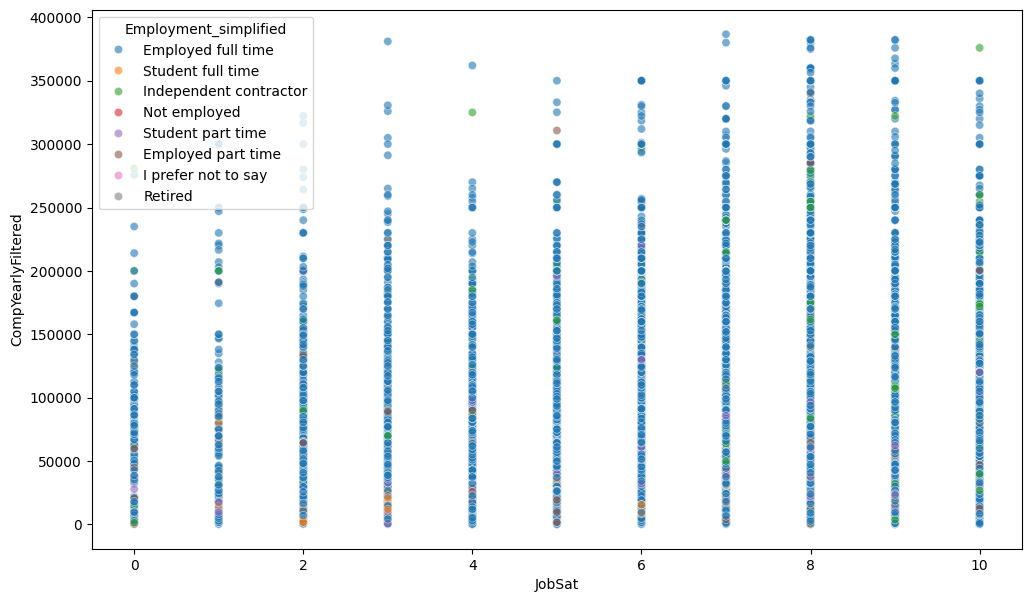

In [48]:
plt.figure(figsize=(12,7))
sns.scatterplot(
    data=df,
    x='JobSat',
    y='CompYearlyFiltered',
    hue='Employment_simplified',
    alpha=0.6
)
plt.show()


#### 2. Scatter Plot for Work Experience vs. Age Group by Country


Compare work experience (`YearsCodePro`) across different age groups (`Age`) and countries (`Country`). Use colors to represent different countries and markers for age groups.


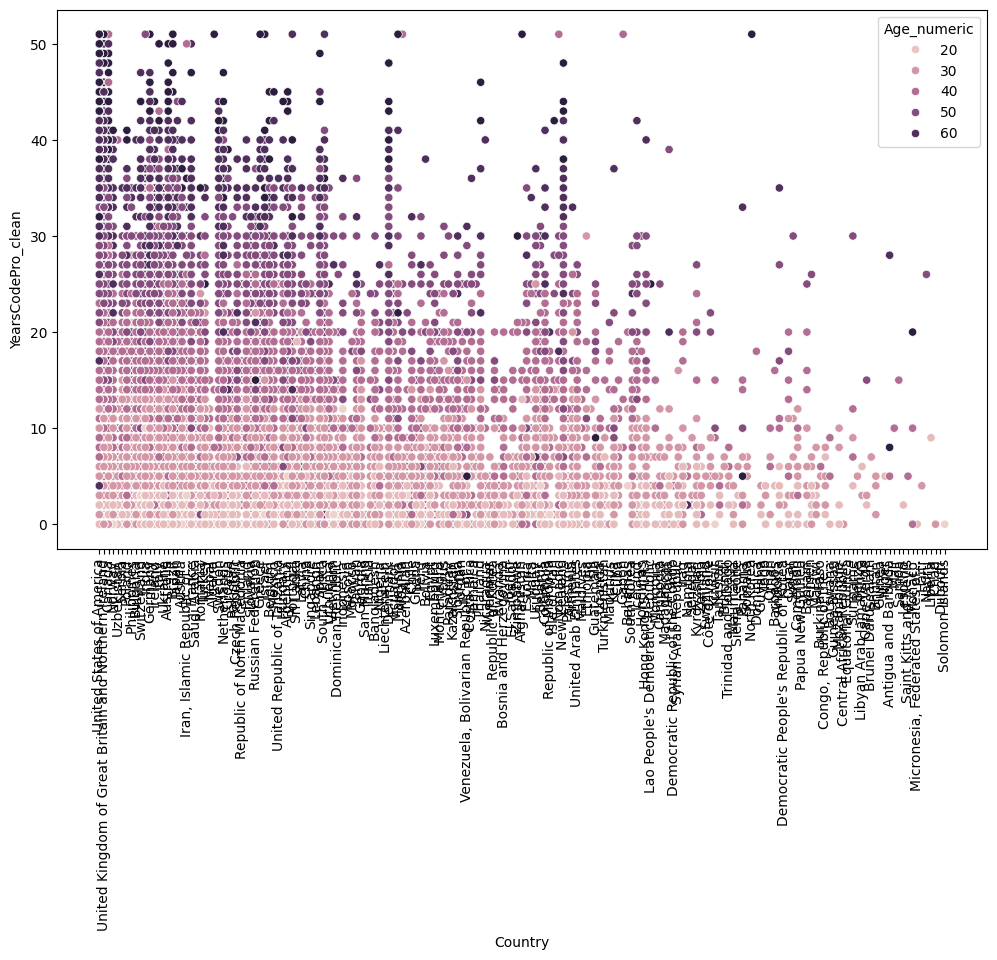

In [50]:
## Write your code here
plt.figure(figsize = (12,7))
sns.scatterplot(
    data = df,
    x= 'Country',
    y = 'YearsCodePro_clean',
    hue = 'Age_numeric'
)
plt.xticks(rotation = 90)
plt.show()

### Final Step: Review


With these scatter plots, you will have analyzed data relationships across multiple dimensions, including compensation, job satisfaction, employment types, and demographics, to uncover meaningful trends in the developer community.


### Summary


After completing this lab, you will be able to:
- Analyze how numerical variables relate across specific groups, such as employment types and countries.
- Use scatter plots effectively to represent multiple variables with color, size, and markers.
- Gain insights into compensation, satisfaction, and demographic trends using advanced scatter plot techniques.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
